In [6]:
import json
data = {}
with open('doklad_db_2703.json', 'r') as f:
    data = json.load(f)

In [7]:
data

{'maxet24': {'id': 779173619,
  'username': 'maxet24',
  'doklad_gens': 13,
  'themes': ['Виды ледников',
   'Глобальные проблемы продовольственного характера и Россия.',
   'Строение воды, её молекулярная структура и изотопный состав. Химические и физические свойства воды.',
   'Сколько весит слон?',
   'Топ 5 бомжей Константинополя',
   'Глобальное потепление',
   'Двигатель машины',
   '16. Типы биогеографических карт (флористические и фаунистические; классификация по масштабу и др.).',
   'Соотношение понятий биоценоз и биотоп, биогеоценоз и экосистема, особенности их взаимосвязей.',
   'Culture of Norway. Customs, habits, values, holidays, traditions.',
   'Почвы горных областей',
   'Виды крыш домов',
   'Виды крыш домов'],
  'fios': ['Глебов Максим Александрович РСБО-01-23',
   'Глебов Максим Александрович РСБО-01-23',
   'Глебов Максим Александрович РСБО-01-23',
   'Глебов Максим Александрович РСБО-01-23',
   'Глебов Максим Александрович РСБО-01-23',
   'Глебов Максим Александр

In [29]:
# create dates arr
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 12, 3)
end_date = datetime(2024, 3, 27)

# Initialize an empty list to store the formatted dates
uses_by_dates = {}

# Iterate through the dates and format them as strings
current_date = start_date
while current_date <= end_date:
    uses_by_dates[current_date.strftime("%Y-%m-%d")] = 0
    current_date += timedelta(days=1)

# fetch uses by dates
for user in data.keys():
    for date in data[user]['uses_by_days']:
        uses_by_dates[date] += data[user]['uses_by_days'][date]

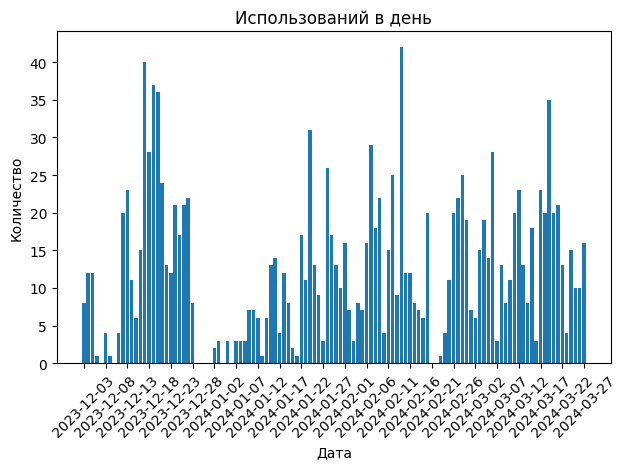

In [37]:
# show
import matplotlib.pyplot as plt

# Extract dates and values from the dictionary
dates = list(uses_by_dates.keys())
values = list(uses_by_dates.values())

# Create a bar graph
plt.bar(dates, values)

# Set the title and labels
plt.title('Использований в день')
plt.xlabel('Дата')
plt.ylabel('Количество')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show every 5th tick label
plt.xticks(range(0, len(dates), 5), list(dates)[::5])

# Show the plot
plt.tight_layout()
plt.show()

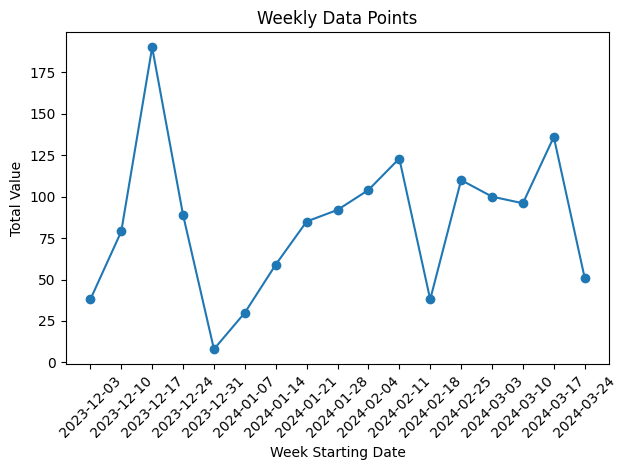

In [42]:
from datetime import datetime, timedelta

dates = [datetime.strptime(date, "%Y-%m-%d") for date in uses_by_dates.keys()]

# Initialize variables for weekly aggregation
weekly_dates = []
weekly_values = []
current_week_start = min(dates)
current_week_value = 0

# Iterate through the data and aggregate weekly values
for date, value in sorted(uses_by_dates.items()):
    date_obj = datetime.strptime(date, "%Y-%m-%d")
    if date_obj >= current_week_start + timedelta(days=7):
        weekly_dates.append(current_week_start.strftime("%Y-%m-%d"))
        weekly_values.append(current_week_value)
        current_week_start += timedelta(days=7)
        current_week_value = 0
    current_week_value += value

# Append the last week's data
weekly_dates.append(current_week_start.strftime("%Y-%m-%d"))
weekly_values.append(current_week_value)

# Create a line graph for weekly data
plt.plot(weekly_dates, weekly_values, marker='o')

# Set the title and labels
plt.title('Weekly Data Points')
plt.xlabel('Week Starting Date')
plt.ylabel('Total Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()